## Packages Installation:

In [2]:

pip install timm

Note: you may need to restart the kernel to use updated packages.


In [3]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision as tv
from torchvision import datasets, models, transforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import os
import copy
import requests
import io 
import timm 
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, f1_score
from torch.nn import CrossEntropyLoss
plt.ion()


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
device_compact = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device_compact)

cpu


In [5]:
vit_models_project = timm.list_models('*vit*', pretrained=True)
vit_models_project

['convit_base.fb_in1k',
 'convit_small.fb_in1k',
 'convit_tiny.fb_in1k',
 'crossvit_9_240.in1k',
 'crossvit_9_dagger_240.in1k',
 'crossvit_15_240.in1k',
 'crossvit_15_dagger_240.in1k',
 'crossvit_15_dagger_408.in1k',
 'crossvit_18_240.in1k',
 'crossvit_18_dagger_240.in1k',
 'crossvit_18_dagger_408.in1k',
 'crossvit_base_240.in1k',
 'crossvit_small_240.in1k',
 'crossvit_tiny_240.in1k',
 'davit_base.msft_in1k',
 'davit_small.msft_in1k',
 'davit_tiny.msft_in1k',
 'efficientvit_b0.r224_in1k',
 'efficientvit_b1.r224_in1k',
 'efficientvit_b1.r256_in1k',
 'efficientvit_b1.r288_in1k',
 'efficientvit_b2.r224_in1k',
 'efficientvit_b2.r256_in1k',
 'efficientvit_b2.r288_in1k',
 'efficientvit_b3.r224_in1k',
 'efficientvit_b3.r256_in1k',
 'efficientvit_b3.r288_in1k',
 'efficientvit_l1.r224_in1k',
 'efficientvit_l2.r224_in1k',
 'efficientvit_l2.r256_in1k',
 'efficientvit_l2.r288_in1k',
 'efficientvit_l2.r384_in1k',
 'efficientvit_l3.r224_in1k',
 'efficientvit_l3.r256_in1k',
 'efficientvit_l3.r320_in1

In [6]:
from IPython.display import HTML, display
def progress_bar(current_value, total_value=100):
    return HTML(""" 
                <progress
                 value='{current}' 
                max='{total}', 
                style='width: 100%'>
                {current} 
                </progress> 
                """.format(current=current_value, total=total_value))

## Importing & Labelling Dataset

In [7]:
project_dataset_path = "C:\\Users\\User\\OneDrive\\Documents\\Spring Capstone 2024\\Chest_xray_Corona_Metadata.csv"
project_dataset_path = pd.read_csv(project_dataset_path)
project_dataset_path.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [8]:
normal_data = project_dataset_path[project_dataset_path["Label"] == "Normal"]
virus_data = project_dataset_path[project_dataset_path["Label_1_Virus_category"] == "Virus"]
print(normal_data.shape[0], virus_data.shape[0])
print(project_dataset_path.shape)
#print(normal_data)
#print(virus_data)

1576 1555
(5910, 6)


In [9]:
dataset_path = "C:\\Users\\User\\OneDrive\\Documents\\Spring Capstone 2024\\Dataset\\Data"
normal_images_path = f"{dataset_path}//normal"
virus_images_path = f"{dataset_path}//virus"

directory_mapping = {
    normal_images_path: normal_data,
    virus_images_path: virus_data,
}

#print(directory_mapping)

for directory in directory_mapping.keys():
    if not os.path.exists(directory):
        os.mkdir(directory)
        
old_data_path = "c:\\Users\\User\\OneDrive\\Documents\\Spring Capstone 2024\\Dataset\\Chest-XRay-Dataset"

for current_dir, metadata in directory_mapping.items():
    #print(directory)
    for img_name in metadata["X_ray_image_name"]:
        if os.path.exists(f"{old_data_path}/train/{img_name}"):
            os.rename(f"{old_data_path}/train/{img_name}", f"{current_dir}/{img_name}")
        elif os.path.exists(f"{old_data_path}/test/{img_name}"):
            os.rename(f"{old_data_path}/test/{img_name}", f"{current_dir}/{img_name}")


## Loading Dataset

In [10]:
input_size = 3, 128, 128
image_size = 128
num_output_classes = 2
batch_size = 32
interpolation = 'bicubic'
IMAGENET_DEFAULT_MEAN  = (0.485, 0.456, 0.406)
IMAGENET_DEFAULT_STD = (0.229, 0.224, 0.225)
DEFAULT_CROP_PCT = 0.9

### Creating Dataset and DataLoader



#### Option2: Use same dataset and dataloader as BiT experiment:

In [11]:
dataload_dir = "C:\\Users\\User\\OneDrive\\Documents\\Spring Capstone 2024\\Dataset\\Data"
dataload_transforms = transforms.Compose([
        transforms.Resize(150),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
    ])
img_datasets = datasets.ImageFolder(dataload_dir, dataload_transforms)

In [12]:
dataset_imgsizes = len(img_datasets)
class_labels = img_datasets.classes
print(dataset_imgsizes, class_labels)

1141 ['normal', 'virus']


In [13]:
val_size = int(dataset_imgsizes*0.15)
train_dataset, value_dataset, test_dataset = torch.utils.data.random_split(img_datasets, [dataset_imgsizes-2*val_size, val_size, val_size], generator=torch.Generator().manual_seed(42))
train_length, val_length = len(train_dataset), len(value_dataset)
print(len(train_dataset))
print(len(value_dataset))
print(len(test_dataset))

799
171
171


In [14]:
loader_train = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
loader_val = torch.utils.data.DataLoader(value_dataset, batch_size=batch_size, shuffle=False)

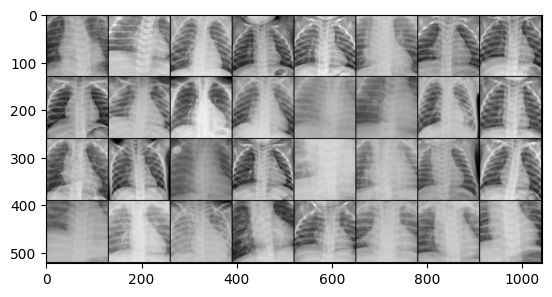

In [15]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) 
inputs, classes = next(iter(loader_train))
out = tv.utils.make_grid(inputs)
imshow(out)


## Fine-Tuning:

In [16]:

def evaluate_model_accuracy(model, validation_loader):
    model.eval()
    total_correct = 0
    total_samples = len(validation_loader.dataset)
    with torch.no_grad():
        for inputs, targets in validation_loader:
            inputs, targets = inputs.to(device_compact), targets.to(device_compact)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_correct += (predicted == targets).sum().item()

    accuracy = total_correct / total_samples
    return accuracy

In [17]:
model = timm.create_model('vit_base_resnet50_224_in21k', pretrained=True, num_classes=num_output_classes, img_size=image_size)
model.to(device_compact)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\timm\models\_factory.py:117: UserWarning: Mapping deprecated model name vit_base_resnet50_224_in21k to current vit_base_r50_s16_224.orig_in21k.
  model = create_fn(


VisionTransformer(
  (patch_embed): HybridEmbed(
    (backbone): ResNetV2(
      (stem): Sequential(
        (conv): StdConv2dSame(3, 64, kernel_size=(7, 7), stride=(2, 2), bias=False)
        (norm): GroupNormAct(
          32, 64, eps=1e-05, affine=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (pool): MaxPool2dSame(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False)
      )
      (stages): Sequential(
        (0): ResNetStage(
          (blocks): Sequential(
            (0): Bottleneck(
              (downsample): DownsampleConv(
                (conv): StdConv2dSame(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (norm): GroupNormAct(
                  32, 256, eps=1e-05, affine=True
                  (drop): Identity()
                  (act): Identity()
                )
              )
              (conv1): StdConv2dSame(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      

### Using the Default Optimizer, Loss_Function and LR_Scheduler

In [19]:
def configure_parameters(model, decay_rate=1e-5, excluded_list=()):
    parameters_with_decay = []
    parameters_without_decay = []
    for param_name, parameter in model.named_parameters():
        if not parameter.requires_grad:
            continue  # frozen weights
        if parameter.dim() == 1 or param_name.endswith(".bias") or param_name in excluded_list:
            parameters_without_decay.append(parameter)
        else:
            parameters_with_decay.append(parameter)
    return [
        {'params': parameters_without_decay, 'weight_decay': 0.},
        {'params': parameters_with_decay, 'weight_decay': decay_rate}
    ]

# Setting up parameters values to the optimizer
exclusion_list = {}
if hasattr(model, 'no_weight_decay'):
    exclusion_list = model.no_weight_decay()
optimizer_param = configure_parameters(model, 0.0001, exclusion_list)
decay_value = 0.

# Configure the optimizer with the updated parameters
optimizer = optim.SGD(optimizer_param, momentum=0.9, nesterov=True, lr=0.01, weight_decay=decay_value)

In [ ]:
from timm.scheduler import StepLRScheduler
from timm.loss import LabelSmoothingCrossEntropy
loss_fn = LabelSmoothingCrossEntropy(smoothing=0.1)
start_epoch = 0
num_epochs =15
noise_range = None
lr_scheduler = StepLRScheduler(optimizer, decay_t=30, decay_rate=0.1,
               warmup_lr_init=0.0001, warmup_t=3, noise_range_t=None, noise_pct=0.67,
               noise_std=1., noise_seed=42)

### Training and Evaluating the Model:

In [36]:
iters = 15

pb_train = display(progress_bar(0, iters), display_id=True)
losses = [[]]
accus_train = [[]]
accus_val = []

for i in range(iters):
  for x, t in loader_train:
    x, t = x.to(device_compact), t.to(device_compact)
    logits = model(x)
    loss = loss_fn(logits, t)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    losses[-1].append(loss.item())

    with torch.no_grad():
      accus_train[-1].append(torch.sum(torch.max(logits, dim=1)[1] == t))

  losses[-1] = sum(losses[-1])
  losses.append([])
  accus_train[-1] = sum(accus_train[-1]) / train_length
  accus_train.append([])

  lr_scheduler.step(i + 1)

  accus_val.append(evaluate_model_accuracy(model, loader_val))
  model.train()

  pb_train.update(progress_bar(i, iters))
  print(f'\r[Step {i+1}] loss={loss:.2e} '
        f'\r[Step {i+1}] loss={losses[-2]:.2e} '
        f'train accu={accus_train[-2]:.2%} '
        f'validation accu={accus_val[-1]:.2%} '
        , flush=True)

171
[Step 1] loss=1.26e+01 train accu=84.73% validation accu=95.91% 
171
[Step 2] loss=1.82e+01 train accu=58.57% validation accu=51.46% 
171
[Step 3] loss=1.57e+01 train accu=69.59% validation accu=94.74% 
171
[Step 4] loss=1.12e+01 train accu=85.36% validation accu=93.57% 
171
[Step 5] loss=9.84e+00 train accu=89.49% validation accu=94.74% 
171
[Step 6] loss=8.62e+00 train accu=91.36% validation accu=93.57% 
171
[Step 7] loss=7.89e+00 train accu=93.37% validation accu=93.57% 
171
[Step 8] loss=8.41e+00 train accu=91.61% validation accu=95.32% 
171
[Step 9] loss=7.58e+00 train accu=93.37% validation accu=94.15% 
171
[Step 10] loss=7.17e+00 train accu=94.74% validation accu=94.15% 
171
[Step 11] loss=7.52e+00 train accu=92.99% validation accu=95.32% 
171
[Step 12] loss=6.70e+00 train accu=96.37% validation accu=95.91% 
171
[Step 13] loss=6.49e+00 train accu=96.37% validation accu=94.15% 
171
[Step 14] loss=6.19e+00 train accu=97.50% validation accu=94.74% 
171
[Step 15] loss=6.35e+00 t

## Model Testing:

In [37]:

model.eval()
criterion = CrossEntropyLoss()
loader_test = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
preds = []
test_loss = 0.0
test_loss1 = 0.0

with torch.no_grad():
    for input, target in loader_test:
        input, target = input.to(device_compact), target.to(device_compact)
        logits = model(input)
        loss_test = criterion(logits, target)
        loss_11 = loss_fn(logits, target)
        test_loss1 += loss_11.detach().cpu().item() / len(test_dataset)
        test_loss += loss_test.detach().cpu().item() / len(test_dataset)
        preds.append(torch.sum(torch.max(logits, dim=1)[1] == target))

accur_test = sum(preds) / len(test_dataset)
print(accur_test)
print(accur_test.detach().cpu().item(), f"test_loss: {test_loss:.2f}", f"test_loss1: {test_loss1:.2f}")

tensor(0.8947)
0.8947368264198303 test_loss: 0.01 test_loss1: 0.01


## Getting true and predicted values:


In [38]:

true_labels = []
predicted_labels = []

with torch.no_grad():
    for input, target in loader_test:
        input, target = input.to(device_compact), target.to(device_compact)
        model_outputs = model(input)
        predicted = torch.max(torch.exp(model_outputs), 1)[1]
        model_outputs = (torch.max(torch.exp(model_outputs), 1)[1]).data.cpu().numpy()
        predicted_labels.extend(model_outputs)
        true_labels.extend(target.data.cpu().numpy())

print(true_labels)
print(predicted_labels)


[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]
[0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

## Performance Evaluation:


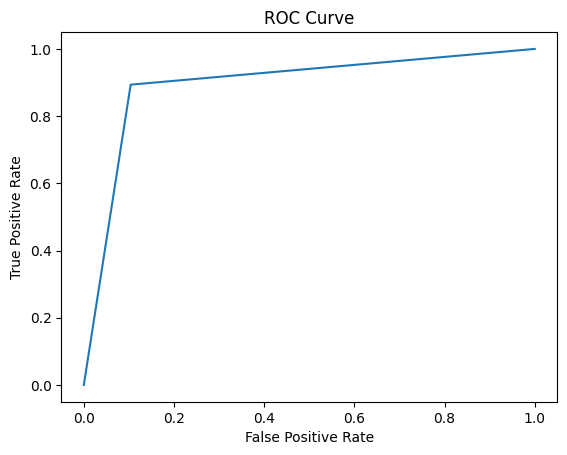

F1 Score: 0.9032258064516129
Sensitivity Score: 0.8961038961038961
Specificity Score: 0.8936170212765957


In [41]:
def roc_plot(true_labels, predicted_labels):
 fpr, tpr, _ = roc_curve(true_labels, predicted_labels)
 plt.plot(fpr, tpr)
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 plt.title('ROC Curve')
 plt.show()

def f1(true_labels, predicted_labels):
 f1 = f1_score(true_labels, predicted_labels)
 return f1.item()

def sensitivity(true_labels, predicted_labels):
 matrix = confusion_matrix(true_labels, predicted_labels)
 return matrix[0, 0] / (matrix[0, 0] + matrix[0, 1])

def specificity(true_labels, predicted_labels):
 matrix = confusion_matrix(true_labels, predicted_labels)
 return matrix[1, 1] / (matrix[1, 0] + matrix[1, 1])

roc_plot(true_labels, predicted_labels)
f = f1(true_labels, predicted_labels)
print("F1 Score:", f)
sens = sensitivity(true_labels, predicted_labels)
print("Sensitivity Score:", sens)
spec = specificity(true_labels, predicted_labels)
print("Specificity Score:", spec)


## Save Model Path:

In [43]:
save_model_path = "C:\\Users\\User\\OneDrive\\Documents\\Spring Capstone 2024\\Model Path\\vit_model_path.pth"
torch.save(model, save_model_path)